In [152]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

from scipy.stats import zscore

## Question 1

Import the data set and print 10 random rows from the data set

In [154]:
import random as rn

In [155]:
#Attribute Information:

#1. sepal length in cm 
#2. sepal width in cm 
#3. petal length in cm 
#4. petal width in cm 
#5. class: 
#-- Iris Setosa 
#-- Iris Versicolour 
#-- Iris Virginica

In [156]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

iris_df = pd.read_csv("bezdekIris.data", names= colnames)

In [157]:
iris_df.sample(10)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
52,6.9,3.1,4.9,1.5,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [159]:
# after looking at the data don't see any missing value, but as this is small data set but if it would have larger.
# so for missing values

In [160]:
# replace the zero of relevent columns with zero value to median()
# I have not considered 'test' for zero replacement with median  
# considering that test has not been performed

to_replace_col = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm']

for column in to_replace_col:
    iris_df[column] = iris_df[column].replace(0, np.NaN)
    median = iris_df[column].median(skipna = True)
    iris_df[column] = iris_df[column].replace(np.NaN, median)
    
iris_df.sample(2)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [161]:
iris_df.groupby('class').count()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [91]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [162]:
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [163]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in iris_df.columns: # Loop through all columns in the dataframe
    if iris_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        iris_df[feature] = pd.Categorical(iris_df[feature]).codes # Replace strings with an integer

In [164]:
iris_df.groupby('class').count()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [165]:
iris_df.drop("class", axis=1).apply(lambda x: x.corr(iris_df['class']))

sepal_length_in_cm    0.782561
sepal_width_in_cm    -0.426658
petal_length_in_cm    0.949035
petal_width_in_cm     0.956547
dtype: float64

In [10]:
# No parameter has correlation in range -0.1 to 0.1, so not dropping any

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [166]:
iris_df.apply(lambda x: x.var())

sepal_length_in_cm    0.685694
sepal_width_in_cm     0.189979
petal_length_in_cm    3.116278
petal_width_in_cm     0.581006
class                 0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

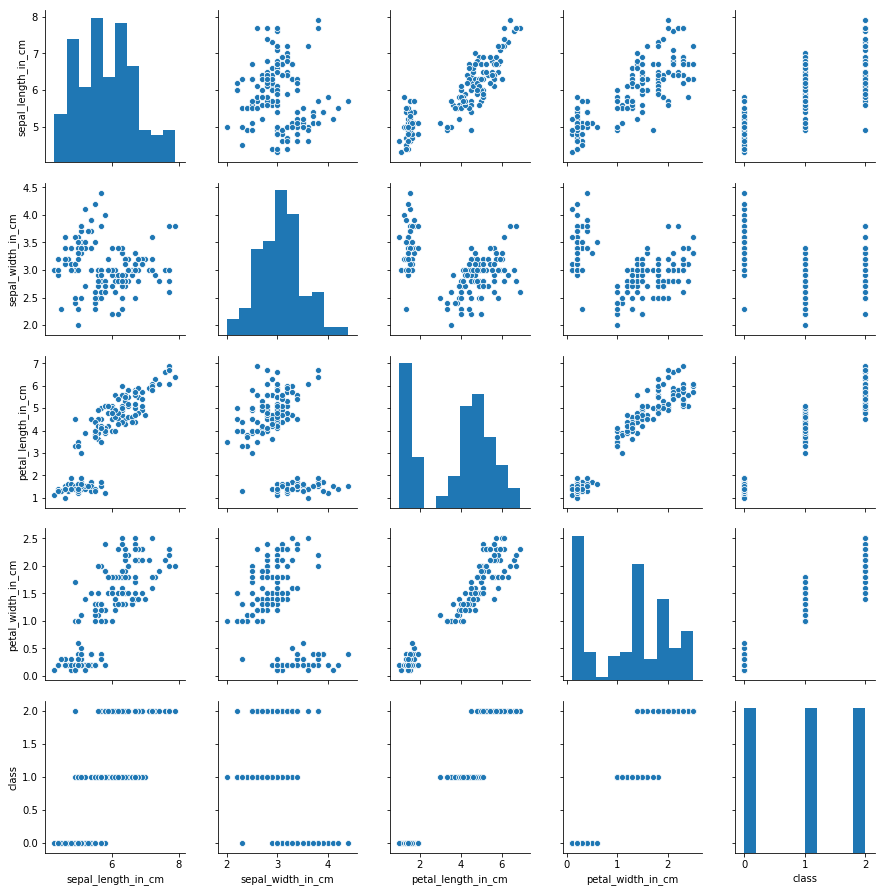

In [97]:
sns.pairplot(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [167]:
X = iris_df.drop('class', axis = 1)
y = iris_df[['class']]

In [168]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
knn_model = KNeighborsClassifier(n_neighbors= 3)

In [171]:
# Call Nearest Neighbour algorithm

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [172]:
y_predict = knn_model.predict(X_test)

In [173]:
accuracy_score(y_test, y_predict)

0.9

Accuracy Score with k=3 is 90%

In [174]:
knn_model_5 = KNeighborsClassifier(n_neighbors= 5)
knn_model_5.fit(X_train, y_train)
y_predict = knn_model_5.predict(X_test)
accuracy_score(y_test, y_predict)

0.9

In [175]:
knn_model_9 = KNeighborsClassifier(n_neighbors= 9)
knn_model_9.fit(X_train, y_train)
y_predict = knn_model_9.predict(X_test)
accuracy_score(y_test, y_predict)

0.9

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [176]:
col = ['k','MSE']
mse_df = pd.DataFrame(columns=col)


In [177]:
metrics.confusion_matrix(y_test, y_predict)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)

In [178]:
from sklearn.metrics import zero_one_loss


In [179]:

for x in range(1, 20, 2):
    knn_model_x = KNeighborsClassifier(n_neighbors= x)
    knn_model_x.fit(X_train, y_train)
    y_predict = knn_model_x.predict(X_test)
    mse = zero_one_loss(y_test, y_predict)
    #mse = 1 - accuracy_score(y_test, y_predict)
    df2 = pd.DataFrame([[x, mse]], columns=['k','MSE'])
    mse_df = mse_df.append(df2) #, ignore_index=True)

mse_df
   # print('With k = '+ str(x) + ', Misclassification error (MSE) = ' + str(1 - accuracy_score(y_test, y_predict)))

,k,MSE
0,1,0.100000
0,3,0.100000
0,5,0.100000
0,7,0.133333
0,9,0.100000
0,11,0.100000
0,13,0.100000
0,15,0.100000
0,17,0.100000
0,19,0.100000


In [111]:
mse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 2 columns):
k      10 non-null object
MSE    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [180]:
#in range of 1-19 with diff of 2
# all are in optimal range except for the k=7, So we take the lesser k. which will be optimal.
# So 3 is the optimal k

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

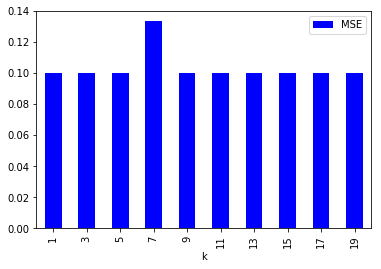

In [181]:
mse_df["k"]=mse_df["k"].astype(int)
mse_df.plot(kind='bar',x='k',y='MSE',color='blue')

# Naive Bayes with Iris Data

In [182]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [183]:
X = iris_df.drop('class', axis = 1)
y = iris_df[['class']]

In [184]:
#Check the dataset
print(y)
print(X)

     class
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
..     ...
120      2
121      2
122      2
123      2
124      2
125      2
126      2
127      2
128      2
129      2
130      2
131      2
132      2
133      2
134      2
135      2
136      2
137      2
138      2
139      2
140      2
141      2
142      2
143      2
144      2
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]
     sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [185]:
df = iris_df.groupby('class').count()

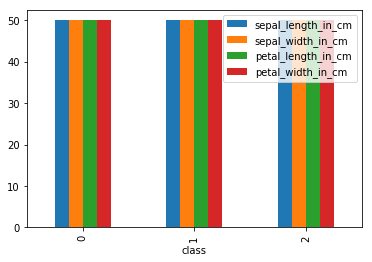

In [186]:
df.plot(kind='bar')

In [71]:
#Drop Id variable from data
# there is no ID variable

### Question 12 
Find Correlation among all variables and give your insights 

In [1]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [187]:
iris_df.drop("class", axis=1).apply(lambda x: x.corr(iris_df['class']))

sepal_length_in_cm    0.782561
sepal_width_in_cm    -0.426658
petal_length_in_cm    0.949035
petal_width_in_cm     0.956547
dtype: float64

### Split data in Training and test set in 80:20.

In [188]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [189]:
X_train.apply(zscore)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
126,0.433259,-0.596536,0.626011,0.820905
79,-0.157549,-1.056885,-0.097380,-0.216028
22,-1.457326,1.244861,-1.488515,-1.252960
139,1.260390,0.093988,0.959884,1.209754
74,0.669582,-0.366361,0.347784,0.172822
45,-1.221002,-0.136187,-1.265934,-1.123343
36,-0.393872,1.014686,-1.321579,-1.252960
5,-0.512033,1.935384,-1.098997,-0.993727
17,-0.866518,1.014686,-1.265934,-1.123343
102,1.496713,-0.136187,1.238111,1.209754


### Question 14 
Train and Fit NaiveBayes Model

In [194]:
#Using Gausian Naive Bayes

In [195]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [196]:
model = GaussianNB()

In [197]:
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [198]:
#Predict
y_predict = model.predict(X_test)

In [200]:
#using Multinomial, but multinomial fits for the train data having categorised values, here data contains linear values.
# So not using Multinomial

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [201]:
# show Confusion Matrix
metrics.confusion_matrix(y_test, y_predict)

array([[7, 0, 0],
       [0, 9, 3],
       [0, 2, 9]], dtype=int64)

In [202]:
# show accuracy
y_test.size
a = 25/30
print(a*100)

83.33333333333334


In [203]:
model.score(X_test, y_test)*100

83.33333333333334

#Show precision and Recall metrics


In [256]:
THRESHOLD = 0.001
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)


In [263]:
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds, average = 'micro'),
                   precision_score(y_test, preds, average = 'micro')], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.633333
recall,0.633333
precision,0.633333


Don't know how to analyse it for Multivariate target

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [15]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779